# Learn X in Y Minutes
## Where X=Pandas

_Inspired by the popular [learnxinyminutes](https://learnxinyminutes.com/)._

Pandas is the shorthand for 'Python and Data Analysis'. It provides a rich set of features for exploring and manipulating data, making it the go-to toolkit for a lot of data scientists. 

This is intended to be an intro or a refresher.

Since Pandas is a Python library, you might want to check out [Python](https://learnxinyminutes.com/docs/python/) first.

---

# Basics
Let's get the hang of Pandas!

In [1]:
# import pandas
import pandas as pd

# 0.22 is the latest ao 01/18
pd.__version__

u'0.22.0'

In [2]:
# Panda's dataframe object is like an SQL table; made up of rows and columns
import random
df = pd.DataFrame([[random.randint(0,9) for i in range(10)] for i in range(5)],
                  index=[i for i in range(5)], 
                  columns=list('abcdefghij'))

df # => a 5*10 matrix/table

,a,b,c,d,e,f,g,h,i,j
0,3,1,6,7,3,8,5,4,6,9
1,7,4,9,4,5,9,2,0,8,0
2,6,4,8,6,8,7,7,4,3,5
3,5,8,9,6,3,3,9,1,2,6
4,1,3,1,5,8,2,6,8,3,8


In [3]:
# Add another column
df['grp'] = pd.DataFrame(['a', 'b'] * 5)

In [4]:
# ..headers
df.columns

Index([u'a', u'b', u'c', u'd', u'e', u'f', u'g', u'h', u'i', u'j', u'grp'], dtype='object')

In [5]:
# ..just the first ones
df.head(2)

,a,b,c,d,e,f,g,h,i,j,grp
0,3,1,6,7,3,8,5,4,6,9,a
1,7,4,9,4,5,9,2,0,8,0,b


In [6]:
# ..or the last ones
df.tail(2)

,a,b,c,d,e,f,g,h,i,j,grp
3,5,8,9,6,3,3,9,1,2,6,b
4,1,3,1,5,8,2,6,8,3,8,a


In [7]:
# Select specific columns
df[['d', 'f']]

,d,f
0,7,8
1,4,9
2,6,7
3,6,3
4,5,2


In [8]:
# ..rows
df[2:4]

,a,b,c,d,e,f,g,h,i,j,grp
2,6,4,8,6,8,7,7,4,3,5,a
3,5,8,9,6,3,3,9,1,2,6,b


In [9]:
# Rename columns
df = df.rename(columns = {'a': 'aa', 'b': 'bb'})
list(df.columns)

['aa', 'bb', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'grp']

In [10]:
# Create new column from other columns. Same index, same column operation. 
df['ij'] = df['i'] + df['j']
df[1:3]

,aa,bb,c,d,e,f,g,h,i,j,grp,ij
1,7,4,9,4,5,9,2,0,8,0,b,8
2,6,4,8,6,8,7,7,4,3,5,a,8


You have more ways to view data.

In [11]:
# Filter specific rows. This reads as - from df, get rows with even values on column f
df[df['f'] % 2 == 0] 

,aa,bb,c,d,e,f,g,h,i,j,grp,ij
0,3,1,6,7,3,8,5,4,6,9,a,15
4,1,3,1,5,8,2,6,8,3,8,a,11


In [12]:
# Show only wanted columns
df[df['f'] > 5][['f', 'bb']] 

,f,bb
0,8,1
1,9,4
2,7,4


In [13]:
# Filtering will accept expressions that evaluate as True / False 
df[(df['aa'].isin([3, 5])) | (df['bb'] < 4)][['aa', 'bb']]

,aa,bb
0,3,1
3,5,8
4,1,3


In [14]:
# Group and aggregate!
df['grp'] = pd.DataFrame(['a', 'b'] * 5) # => add a column with discrete values
df.groupby(['grp']).agg({'c': 'sum', 'd': 'mean', 'e': 'min', 'f': 'max'})[['c', 'd', 'e', 'f']]

# => grouped using the categorical vars, then aggregated by column depending on the function specified
# the agg function accepts a dict of {column: func_name or numpy_func}

,c,d,e,f
grp,,,,
a,15,6,3,8
b,18,5,3,9


In [15]:
# ..and order / sort too
df.sort_values(by=['ij'], ascending=[False])[['ij']]

,ij
0,15
4,11
1,8
2,8
3,8


In [16]:
# You can chain operations.
df[df['ij'] > 5] \
  .groupby(['grp']) \
  .agg('sum') \
  .sort_values(['ij'], ascending=[True])

,aa,bb,c,d,e,f,g,h,i,j,ij
grp,,,,,,,,,,,
b,12,12,18,10,8,12,11,1,10,6,16
a,10,8,15,18,19,17,18,16,12,22,34


In [17]:
# This is how you join. 
# There are variants (left, right, inner, outer) available.
df_2 = pd.DataFrame([[random.randint(0,9) for i in range(2)] for i in range(5)],
                  index=[i for i in range(5)], 
                  columns=['b_2', 'c_2']) # => another df

df[['bb', 'c']].merge(df_2, left_on='c', right_on='c_2', how='inner')

,bb,c,b_2,c_2
0,4,8,4,8
1,3,1,5,1


Here are some things you will be needing too.

In [18]:
# Append separate datasets w/ same column names
df_3 = pd.DataFrame([[random.randint(0,9) for i in range(10)] for i in range(5)],
                  index=[i for i in range(5)], 
                  columns=list('abcdefghij'))

df.append(df_3).reset_index()[3:7] # => notice NaN values in columns that didn't match

,index,a,aa,b,bb,c,d,e,f,g,grp,h,i,ij,j
3,3,NaN,5.0,NaN,8.0,9,6,3,3,9,b,1,2,8.0,6
4,4,NaN,1.0,NaN,3.0,1,5,8,2,6,a,8,3,11.0,8
5,0,8.0,NaN,0.0,NaN,5,3,5,9,4,NaN,0,2,NaN,3
6,1,7.0,NaN,5.0,NaN,4,5,6,0,2,NaN,0,5,NaN,1


In [19]:
# Lambda goooodness! .apply takes each row and performs a function.
df[['bb']].apply(lambda x: x ** 2)

,bb
0,1
1,16
2,16
3,64
4,9


In [20]:
# Of course, there's a pivot in there. row values as column values.
df.pivot_table(columns='grp', aggfunc='mean') # => makes each ['grp'] value as columns

grp,a,b
aa,3.333333,6.0
bb,2.666667,6.0
c,5.000000,9.0
d,6.000000,5.0
e,6.333333,4.0
f,5.666667,6.0
g,6.000000,5.5
h,5.333333,0.5
i,4.000000,5.0
ij,11.333333,8.0


In [21]:
# A must-have for analysts, describe().. <3
# Basic statistical descriptives
df.describe()

,aa,bb,c,d,e,f,g,h,i,j,ij
count,5.000000,5.00000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000
mean,4.400000,4.00000,6.600000,5.600000,5.40000,5.800000,5.800000,3.400000,4.40000,5.600000,10.000000
std,2.408319,2.54951,3.361547,1.140175,2.50998,3.114482,2.588436,3.130495,2.50998,3.507136,3.082207
min,1.000000,1.00000,1.000000,4.000000,3.00000,2.000000,2.000000,0.000000,2.00000,0.000000,8.000000
25%,3.000000,3.00000,6.000000,5.000000,3.00000,3.000000,5.000000,1.000000,3.00000,5.000000,8.000000
50%,5.000000,4.00000,8.000000,6.000000,5.00000,7.000000,6.000000,4.000000,3.00000,6.000000,8.000000
75%,6.000000,4.00000,9.000000,6.000000,8.00000,8.000000,7.000000,4.000000,6.00000,8.000000,11.000000
max,7.000000,8.00000,9.000000,7.000000,8.00000,9.000000,9.000000,8.000000,8.00000,9.000000,15.000000


That's it. There's a lot more that Pandas can offer. Head to the documentation to check them all out!

Pandas is the hammer, data is the nail. Getting comfortable with the tool means getting hands-on with the things it is supposed to handle.

---

# In Action
Let's use actual data and do some basic descriptive analysis applying examples from above. Along the way, we may learn new stuff. 

Analysis commentary will be in markdown; code implementation will be the python comments.

We'll be using the [Kaggle 2017 Developer Survey](https://www.kaggle.com/kaggle/kaggle-survey-2017/data) dataset to answer a single question - __How popular is Python with the data science community?__ Btw, do check these [kernels](https://www.kaggle.com/kaggle/kaggle-survey-2017/kernels) to see more in-depth analyses of the dataset.

In [22]:
# Load relevant csv's and store in a dataframe. 
schema = pd.read_csv("../resources/kaggle-survey-2017/schema.csv")
responses = pd.read_csv("../resources/kaggle-survey-2017/multipleChoiceResponses.csv", low_memory=False)

In [23]:
pd.set_option('display.max_colwidth', -1) # this just lets you view 'wrapped' cells

schema.tail(1)

,Column,Question,Asked
289,JobFactorPublishingOpportunity,How are you assessing potential job opportunities? - Opportunity to publish my results,Learners


In [24]:
responses.tail(1)

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
16715,Male,Japan,27.0,Employed full-time,NaN,NaN,No,Yes,Programmer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are 290 questions and 16715 answers. There's a lot of data that can be explored.

For our purposes, let's just trim down this list to the relevant ones, and see where the questions point us at.

In [25]:
# Find signal from the noise, perhaps 'Python' in Column field, and 'Language' in Question field
# .str.contains() is a string indexer for the column
schema[schema['Question'].str.contains('language') | schema['Column'].str.contains('Python')]

# 59 rows hidden to save space
schema.iloc[[18, 60, 122]]

,Column,Question,Asked
18,LanguageRecommendationSelect,What programming language would you recommend a new data scientist learn first? (Select one option) - Selected Choice,All
60,JobSkillImportancePython,How important do you think the below skills or certifications are in getting a data science job? - Fluent in Python,Learners
122,WorkToolsSelect,"For work, which data science/analytics tools, technologies, and languages have you used in the past year? (Select all that apply) - Selected Choice",CodingWorker


Hone in on just 3 questions:

Question #18: [LanguageRecommendationSelect]    
_What programming language would you recommend a new data scientist learn first?_ will let us know how people recommend Python.

Question #60: [JobSkillImportancePython]   
_How important do you think the below skills or certifications are in getting a data science job? - Fluent in Python_ will let us know others' view of how important is Python.

Question #122: [WorkToolsSelect]   
_For work, which data science/analytics tools, technologies, and languages have you used in the past year?_ will let us know about Python users from the respondents.

### a) How recommended is Python?
Warm up.

In [26]:
# from the Column field
acol = 'LanguageRecommendationSelect' 

# With a specific column, group specific values, then sort those counts.
responses \
    .groupby(acol) \
    .agg({acol: 'count'}) \
    .sort_values([acol], ascending=[False])

,LanguageRecommendationSelect
LanguageRecommendationSelect,
Python,6941
R,2643
SQL,385
C/C++/C#,307
Matlab,238
Java,138
Scala,94
SAS,88
Other,85


Most recommended, with a far second and third!    
Recommending something to others is often an indicator of how satisfied the current users are to it. 

### b) How important is Python?
Depending on the job of the respondent, let's see how they view Python's importance.

In [27]:
# These will be the rows
bcol_a = 'CurrentJobTitleSelect'
responses[[bcol_a]].dropna().head()

,CurrentJobTitleSelect
0,DBA/Database Engineer
3,Operations Research Practitioner
4,Computer Scientist
5,Data Scientist
6,Computer Scientist


In [28]:
# These will be the columns
bcol_b = 'JobSkillImportancePython'
responses[[bcol_a]].dropna().head()

,CurrentJobTitleSelect
0,DBA/Database Engineer
3,Operations Research Practitioner
4,Computer Scientist
5,Data Scientist
6,Computer Scientist


In [29]:
# Reshape the original dataframe such that values in one becomes the indices, 
# while values in the other one become the columns
p1 = responses[[bcol_a, bcol_b]].reset_index() \
    .pivot_table(index=bcol_a, columns=bcol_b, aggfunc='count') \
    .fillna(0).reset_index()
p1.columns = [bcol_a, 'Necessary', 'Nice to have', 'Unnecessary']
p1.head()

# check with pd.crosstab(responses['bcol_a'], responses['bcol_b']) if values match

,CurrentJobTitleSelect,Necessary,Nice to have,Unnecessary
0,Business Analyst,103.0,54.0,6.0
1,Computer Scientist,19.0,11.0,1.0
2,DBA/Database Engineer,15.0,15.0,1.0
3,Data Analyst,43.0,22.0,5.0
4,Data Miner,4.0,5.0,0.0


In [30]:
# Have another table with totals for comparison
p2 = responses.groupby(bcol_a).count()[[bcol_b]] \
    .fillna(0).reset_index().rename(columns = {bcol_b: 'Total'})
p2.head()

,CurrentJobTitleSelect,Total
0,Business Analyst,163
1,Computer Scientist,31
2,DBA/Database Engineer,31
3,Data Analyst,70
4,Data Miner,9


In [31]:
# Join the two dfs and add another column
p3 = p1.merge(p2, on=bcol_a)
p3['% Necessary'] = p3['Necessary'] / p3['Total']
p3.sort_values(by=['% Necessary'], ascending=[False]).head(10)

,CurrentJobTitleSelect,Necessary,Nice to have,Unnecessary,Total,% Necessary
5,Data Scientist,22.0,6.0,0.0,28,0.785714
7,Machine Learning Engineer,20.0,5.0,1.0,26,0.769231
6,Engineer,86.0,38.0,3.0,127,0.677165
9,Other,214.0,106.0,5.0,325,0.658462
0,Business Analyst,103.0,54.0,6.0,163,0.631902
15,Statistician,13.0,7.0,1.0,21,0.619048
3,Data Analyst,43.0,22.0,5.0,70,0.614286
1,Computer Scientist,19.0,11.0,1.0,31,0.612903
14,Software Developer/Software Engineer,258.0,171.0,13.0,442,0.583710
11,Programmer,64.0,50.0,5.0,119,0.537815


Data Scientists and ML Engineers do really need Python. The top 10 job titles consist of 'builder' types.   
R has a different picture. Slightly higher as Nice to Have, and predominantly 'analyst' types need it.   
A caveat on this is that the counts of the top job titles for both are few observations from the population.

In [32]:
bcol_a, bcol_b_ = 'CurrentJobTitleSelect', 'JobSkillImportanceR'
r1 = responses[[bcol_a, bcol_b_]].reset_index() \
    .pivot_table(index=bcol_a, columns=bcol_b_, aggfunc='count').fillna(0).reset_index()
r1.columns = [bcol_a, 'Necessary', 'Nice to have', 'Unnecessary']
r2 = responses.groupby(bcol_a).count()[[bcol_b_]].fillna(0).reset_index() \
    .rename(columns = {bcol_b_: 'Total'})
r3 = r1.merge(r2, on=bcol_a)
r3['% Necessary'] = r3['Necessary'] / r3['Total']
r3.sort_values(by=['% Necessary'], ascending=[False]).head(10)

,CurrentJobTitleSelect,Necessary,Nice to have,Unnecessary,Total,% Necessary
8,Operations Research Practitioner,2.0,0.0,0.0,2,1.000000
5,Data Scientist,17.0,9.0,1.0,27,0.629630
3,Data Analyst,42.0,30.0,2.0,74,0.567568
0,Business Analyst,89.0,67.0,7.0,163,0.546012
9,Other,164.0,151.0,8.0,323,0.507740
15,Statistician,10.0,9.0,1.0,20,0.500000
4,Data Miner,4.0,5.0,0.0,9,0.444444
7,Machine Learning Engineer,10.0,10.0,3.0,23,0.434783
12,Researcher,22.0,27.0,2.0,51,0.431373
6,Engineer,50.0,60.0,12.0,122,0.409836


### c) Who are the Python users?

Since the top 3 recos are Python, R, SQL, let's see how they compare with actual users.

In [33]:
# What do the values look like?
ccol = 'WorkToolsSelect'
responses[[ccol]].dropna().head(5)

# So it's like checkbox type data entry. Multiple values in one answer; comma-separated. 

,WorkToolsSelect
0,"Amazon Web services,Oracle Data Mining/ Oracle R Enterprise,Perl"
3,"Amazon Machine Learning,Amazon Web services,Cloudera,Hadoop/Hive/Pig,Impala,Java,Mathematica,MATLAB/Octave,Microsoft Excel Data Mining,Microsoft SQL Server Data Mining,NoSQL,Python,R,SAS Base,SAS JMP,SQL,Tableau"
4,"C/C++,Jupyter notebooks,MATLAB/Octave,Python,R,TensorFlow"
5,"Jupyter notebooks,Python,SQL,TensorFlow"
6,"C/C++,Cloudera,Hadoop/Hive/Pig,Java,NoSQL,R,Unix shell / awk"


In [34]:
total = float(responses[ccol].count())

# .get_dummies creates cols for all string values on the comma-separated answer
# each col will just have 1 or 0 if they are found/not found
users = responses[ccol] \
        .str.get_dummies(sep=',').sum().to_frame('Count') \
        .sort_values(['Count'], ascending=[False])[0:10]

# New column with % of the total answers
users['%'] = users['Count'] / total
users

,Count,%
Python,6073,0.763419
R,4708,0.591829
SQL,4261,0.535638
Jupyter notebooks,3206,0.403017
TensorFlow,2256,0.283595
Amazon Web services,1868,0.234821
Unix shell / awk,1854,0.233061
Tableau,1619,0.203520
C/C++,1528,0.192080
NoSQL,1527,0.191955


The ranking of the 3 languages based on actual users seem to be consistent with the ranking on most recommended.   
Python is mentioned 3 out of 4 times as one of their tools.

Focusing on Python, let's see how the spread looks by age and job title.

In [35]:
# Get the python users only
py_users = responses[responses[ccol].str.contains('Python') == True]

In [37]:
# Let's sprinkle some viz w/ seaborn
%matplotlib inline
import seaborn as sb
sb.set_style("darkgrid")

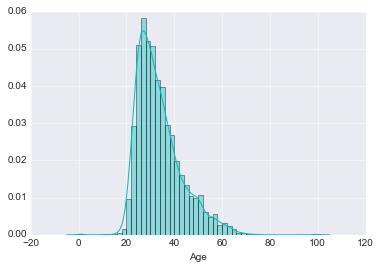

In [38]:
# By age
sb.distplot(py_users['Age'].dropna(), color='c')

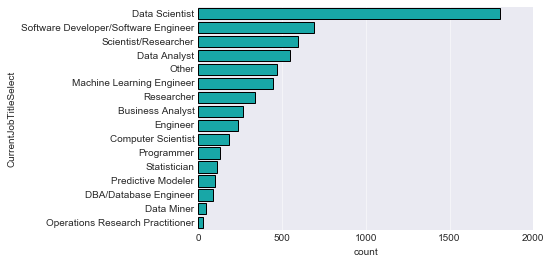

In [39]:
# By job title
sb.countplot(data=py_users, y=bcol_a, order=py_users[bcol_a].value_counts().index, color='c')

Python is popular to young and experienced (25-35) users in data-heavy professions.

For _non-python_ users, how much do they like python to recommend it?   
Answer: Non-python users still recommend python highly.

In [40]:
# Just a combo of previous queries
acol_ = 'Non-Python Users Reco'
responses[acol_] = responses[acol]
responses[responses[ccol].str.contains('Python') == False] \
    .groupby([acol_]).agg({acol: 'count'}) \
    .rename(columns = {acol: 'Count'}) \
    .sort_values(by='Count', ascending=False)

,Count
Non-Python Users Reco,
R,710
Python,363
SQL,123
C/C++/C#,60
Matlab,56
Java,35
SAS,31
Other,26
Scala,24


Lastly, what do python users, use together with python?

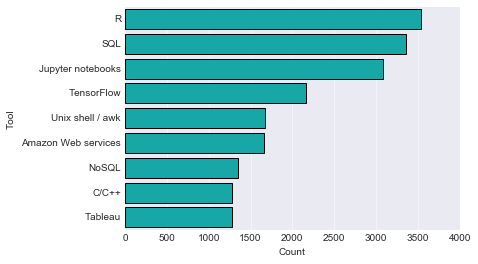

In [41]:
with_py = py_users[ccol].str.get_dummies(sep=',').sum().to_frame().reset_index()
with_py.columns = ['Tool', 'Count']
sb.barplot(data=with_py.sort_values(by='Count', ascending=False)[1:10], y='Tool', x='Count', color='c')

If Python is the most popular, the chart signals the most popular complements: Jupyter for development, Tensorflow for Deep Learning, and AWS for instances.

---
That's about it for this short guide. Time for you to try to dabble with Python & Pandas! :)

# Useful Links
- [Official Pandas Documentation](http://pandas.pydata.org/pandas-docs/stable/)   
- [Pandas Cheatsheet (PDF)](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)   
- [Python for Data Analysis (Book)](https://www.amazon.com/Python-Data-Analysis-Wrangling-IPython/dp/1491957662/ref=pd_sim_14_2?_encoding=UTF8&psc=1&refRID=TJ9Q3J20VHGT3KFN273Q)   
- [Dataschool.io Series on Pandas (Videos)](http://www.dataschool.io/easier-data-analysis-with-pandas/)   
- [Intro to Data Analysis (MOOC)](https://www.udacity.com/course/intro-to-data-analysis--ud170)   